<a href="https://colab.research.google.com/github/plaban1981/Pipelines/blob/master/Simple_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

## Definition of pipeline class according to scikit-learn is


- Sequentially apply a list of transforms and a final estimator. 

- Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

Data Set :
https://github.com/suvoooo/Machine_Learning/blob/master/winequality-red.csv

In [3]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red (1).csv


{'winequality-red.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.9;0.

In [0]:
import pandas as pd 
winedf = pd.read_csv('winequality-red (1).csv',sep=';')

In [7]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Corelation Plot

[]

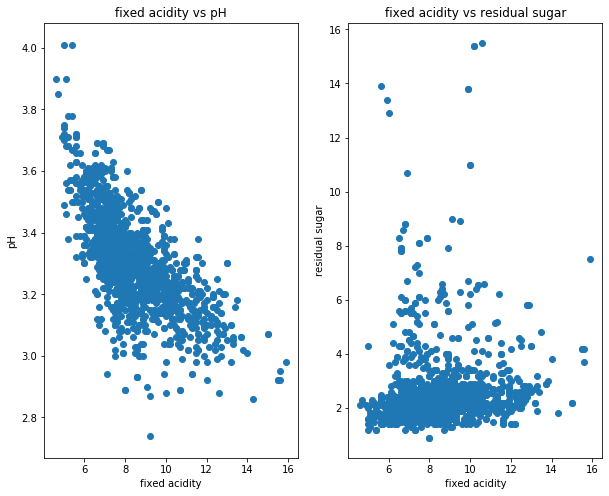

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].scatter(winedf['fixed acidity'],winedf['pH'])
ax[0].set(xlabel='fixed acidity',ylabel = 'pH')
ax[0].set_title('fixed acidity vs pH')
ax[1].scatter(winedf['fixed acidity'],winedf['residual sugar'])
ax[1].set(xlabel='fixed acidity',ylabel = 'residual sugar')
ax[1].set_title('fixed acidity vs residual sugar')
plt.plot()


As expected acidity and pH has a high negative correlation compared to residual sugar and acidity.

#### **pipeline** class allows sticking multiple processes into a single scikit-learn estimator. pipeline class has fit, predict and score method just like any other estimator 

## Separate Features and Labels

In [0]:
X=winedf.drop(['quality'],axis=1)
Y=winedf['quality']

## Import ML libraries

In [0]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
steps = [('scaler',StandardScaler()),('SVM',SVC())]
pipeline = Pipeline(steps=steps)

##Visualize Label distibution

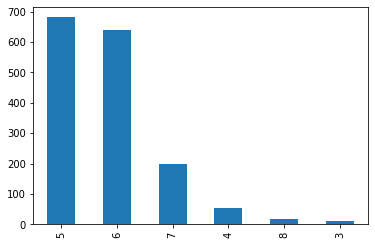

In [27]:
winedf['quality'].value_counts().plot.bar() 

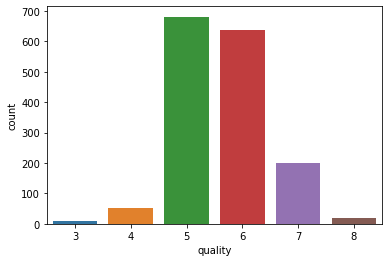

In [31]:
import seaborn as sns
sns.countplot(x='quality',data=winedf.sort_values(by='quality',ascending=False))

It’s necessary to use stratify as I’ve mentioned before that the labels are imbalanced as most of the wine quality falls in the range 5,6

## Split the sample data into training set and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

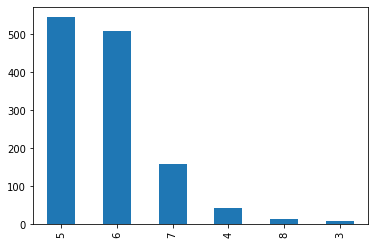

In [37]:
y_train.value_counts().plot.bar() 

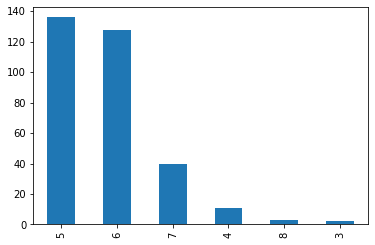

In [36]:
y_test.value_counts().plot.bar() 

####Note : the same proportion of labels is maintained in both test and train set

## Applying Gridsearch to select best hyperparameters

- SVM is usually optimized using two parameters gamma,C

In [0]:
param_grid = {'SVM__C':[0.001,0.1,10,100], 'SVM__gamma':[0.1,0.01]}

In [0]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5,verbose=2)

In [69]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] SVM__C=0.001, SVM__gamma=0.1 ....................................
[CV] ..................... SVM__C=0.001, SVM__gamma=0.1, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.1 ....................................
[CV] ..................... SVM__C=0.001, SVM__gamma=0.1, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.1 ....................................
[CV] ..................... SVM__C=0.001, SVM__gamma=0.1, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.1 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... SVM__C=0.001, SVM__gamma=0.1, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.1 ....................................
[CV] ..................... SVM__C=0.001, SVM__gamma=0.1, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.01 ...................................
[CV] .................... SVM__C=0.001, SVM__gamma=0.01, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.01 ...................................
[CV] .................... SVM__C=0.001, SVM__gamma=0.01, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.01 ...................................
[CV] .................... SVM__C=0.001, SVM__gamma=0.01, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.01 ...................................
[CV] .................... SVM__C=0.001, SVM__gamma=0.01, total=   0.1s
[CV] SVM__C=0.001, SVM__gamma=0.01 ...................................
[CV] .................... SVM__C=0.001, SVM__gamma=0.01, total=   0.1s
[CV] SVM__C=0.1, SVM__gamma=0.1 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001

In [70]:
print("score = %3.2f" %(grid.score(X_test,y_test)))

score = 0.67


In [71]:
print(grid.best_params_)

{'SVM__C': 10, 'SVM__gamma': 0.1}


## Why pipeline

It surely helps to enforce desired order of application steps which in turn helps in reproducibility and creating a convenient work-flow. But, there is something more to pipeline, as we have used grid search cross validation, we can understand it better.